In [11]:
!pip install tensorflow==2.15.0
!pip install keras==2.15.0

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Luisa\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Luisa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Luisa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

OUTPUT_PATH = "../data/splitted/"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
MODEL_PATH = "../src/model/model.keras"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(OUTPUT_PATH, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(OUTPUT_PATH, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(OUTPUT_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

def build_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
num_classes = train_generator.num_classes

model = build_model(input_shape, num_classes)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


Found 4243 images belonging to 3 classes.
Found 908 images belonging to 3 classes.
Found 912 images belonging to 3 classes.


c:\Users\Luisa\Documents\courses\samsung\neumoscan\NeumoScan\keras_tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.4872 - loss: 3.0310 - val_accuracy: 0.7070 - val_loss: 0.6906
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7110 - loss: 0.6802 - val_accuracy: 0.7456 - val_loss: 0.6220
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.7342 - loss: 0.6218 - val_accuracy: 0.7412 - val_loss: 0.6131
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7433 - loss: 0.5974 - val_accuracy: 0.7555 - val_loss: 0.5938
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.7750 - loss: 0.5717 - val_accuracy: 0.7731 - val_loss: 0.5605
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.7713 - loss: 0.5657 - val_accuracy: 0.7632 - val_loss: 0.5592
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.7757 - loss: 0.5629 - val_accuracy: 0.7555 - val_loss: 0.5792
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.7746 - loss: 0.5554 - val_accu

In [4]:
MODEL_PATH = "../src/model/best_model_keras.keras"

In [5]:
model.save(MODEL_PATH)
print(f"\nBest model saved on: {MODEL_PATH}")


Best model saved on: ../src/model/best_model_keras.keras


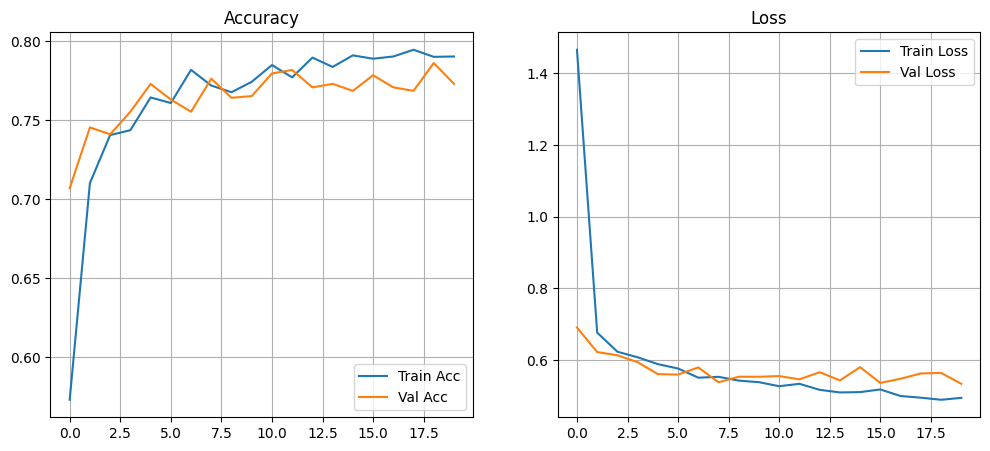

In [6]:
def plot_history(hist):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()

plot_history(history)


29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - accuracy: 0.8487 - loss: 0.3938

Test Presicion: 0.7719
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step

Classification Report:

              precision    recall  f1-score   support

   BACTERIAL       0.76      0.86      0.81       436
      NORMAL       0.86      0.90      0.88       238
       VIRAL       0.68      0.47      0.56       238

    accuracy                           0.77       912
   macro avg       0.77      0.75      0.75       912
weighted avg       0.76      0.77      0.76       912



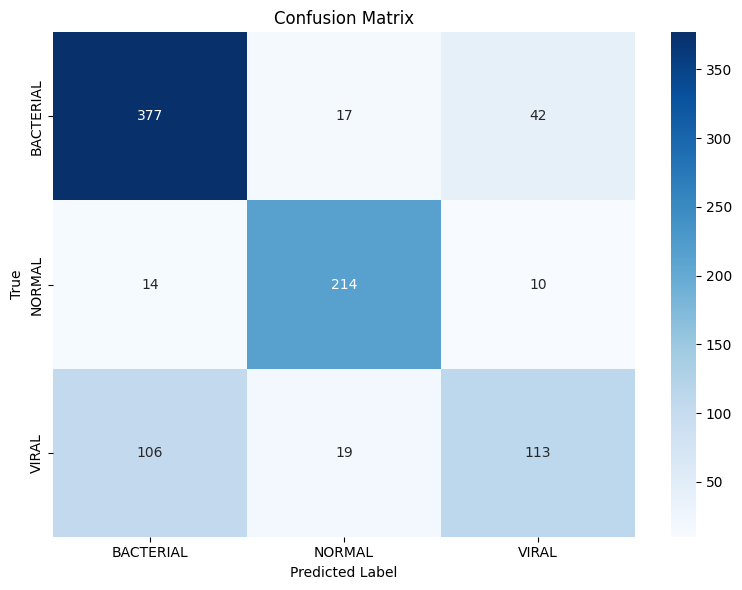

In [7]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Presicion: {test_acc:.4f}")

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True")
plt.tight_layout()
plt.show()